<a href="https://colab.research.google.com/github/taddbackus/capstone/blob/main/Data_cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:
https://geemap.org/notebooks/114_dynamic_world/


# Imports and Setup

In [2]:
!pip -q install --upgrade folium
!pip -q install geopandas
!pip -q install geojson
!pip -q install eeconvert

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 340 kB of archives.
After this operation, 1,538 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex6 amd64 1.9.3-1build1 [266 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex-c6 amd64 1.9.3-1build1 [58.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex-dev amd64 1.9.3-1build1 [16.0 kB]
Fetched 340 kB in 1s (451 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-1b

In [15]:
# reminder that if you are installing libraries in a Google Colab instance you will be prompted to restart your kernal

try:
    import geemap, ee
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        print("package not found, installing w/ pip in Google Colab...")
        !pip install geemap
    else:
        print("package not found, installing w/ conda...")
        !conda install mamba -c conda-forge -y
        !mamba install geemap -c conda-forge -y
    import geemap, ee

In [5]:
pip install eemont

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eemont: filename=eemont-0.3.6-py3-none-any.whl size=135743 sha256=6478597ca98cb0b7aa441453edbfb2f8d00734e53abf1caa587d84532caf1edf
  Stored in directory: /root/.cache/pip/wheels/c2/79/2c/4fed17c3d3b466bbf4fe5872eec11f189147043b01152a4f75
  Created wheel for ee_extra: filename=ee_extra-0.0.15-py3-none-any.whl size=236757 sha256=ca95145c40259035af0fc6c50b192fc5062b8f97fa3bc96141d08bf843aba095
  Stored in directory: /root/.cache/pip/wheels/29/96/0e/4e36b0dfd85e16867723df739294c0aa45a65b191adac4d959
Successfully built eemont ee_extra


In [6]:
# Standard imports
import requests
import json

import pandas as pd
import numpy as np
from PIL import Image

# Geospatial processing packages
import geopandas as gpd
import geojson

import shapely
from shapely.geometry import box

# Mapping and plotting libraries
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import ee
import eeconvert as eec
import geemap
import folium
import eemont

import geopandas as gpd
from shapely.geometry import shape

### Mount Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Authenticate Google Earth Engine
Make sure you have signed up for access to Google Earth Engine at https://signup.earthengine.google.com/#!/. Once your request has been approved, you should be able to access Google Earth Engine at https://code.earthengine.google.com/.

In [8]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=xVt5eH4Dyvw0aGU2t3UGgLCoE8XmIdmq--H9nztCyhI&tc=m2HMyKU1JvKLH4z-OeJRvCTWNus1qS-IObIShEEtb-4&cc=NLKukujlyNMElHlXrdwKYtMJMoVc3HgqyGpKPHBYVFU

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VP97sWsPjw4p7YZqaM_G6psrLiKbo2-m7IwQpgbBi0H8xWhOKeI3x0

Successfully saved authorization token.


In [9]:
# Read the GeoJSON file
tn_mines = gpd.read_file('https://raw.githubusercontent.com/taddbackus/capstone/master/TN_Released_mines.geojson')


# Read data using GeoPandas
print("Data dimensions: {}".format(tn_mines.shape))
tn_mines.sample(3)

Data dimensions: (155, 31)


,id,Shape_Area,Shape_Le_1,area_mine,auger,calculated,coal_bed_n,coalmine_o,comment,company,...,permit_a_2,permit_app,permit_id,permittee,post_smcra,reported_a,shape_Leng,state_trib,steep_slop,geometry
52,00000000000000000025,3.634595e+05,3869.594357,0,0,58.434521,,2,,INDUSTRIAL PROCESSING COMPANY,...,6.218460e+11,0,2383111,INDUSTRIAL PROCESSING COMPANY,1,0.0,3869.594338,,0,"POLYGON ((-84.38722 36.14783, -84.38722 36.147..."
15,00000000000000000083,1.968998e+06,12874.665865,0,0,315.097000,,2,,META ELKHORN MINING CO INC,...,6.253884e+11,0,2808,META ELKHORN MINING CO INC,1,0.0,12874.666063,,0,"POLYGON ((-85.00114 36.33679, -85.00135 36.336..."
147,00000000000000000082,5.618844e+05,6190.027572,0,0,90.335545,,2,,INDUSTRIAL PROCESSING COMPANY,...,6.759324e+11,0,2782,INDUSTRIAL PROCESSING COMPANY,1,0.0,6190.027628,,0,"POLYGON ((-84.39592 36.14917, -84.39595 36.149..."


In [10]:
tn_mines = tn_mines.drop(columns=['permit_app'])
tn_mines = tn_mines.drop(columns=['permit_id'])
tn_mines = tn_mines.drop(columns=['permittee'])
tn_mines = tn_mines.drop(columns=['post_smcra'])
tn_mines = tn_mines.drop(columns=['reported_a'])
tn_mines = tn_mines.drop(columns=['state_trib'])
tn_mines = tn_mines.drop(columns=['shape_Leng'])
tn_mines = tn_mines.drop(columns=['steep_slop'])
tn_mines = tn_mines.drop(columns=['permit_a_2'])
tn_mines = tn_mines.drop(columns=['path'])
tn_mines = tn_mines.drop(columns=['comment'])
tn_mines = tn_mines.drop(columns=['coal_bed_n'])
tn_mines = tn_mines.drop(columns=['informatio'])
tn_mines = tn_mines.drop(columns=['layer'])

tn_mines = tn_mines.rename(columns={'id': 'shapeName'})

In [11]:
tn_mines

,shapeName,Shape_Area,Shape_Le_1,area_mine,auger,calculated,coalmine_o,company,contact,contour,highwall,inspectabl,mine_name,mountainto,msha_id,national_i,geometry
0,0000000000000000000f,279564.400203,4225.466549,0,0,44.778976,2,COALCO INC,4,0,0,2,,0,,TN81-212,"MULTIPOLYGON (((-84.53478 36.29566, -84.53472 ..."
1,0000000000000000007b,24737.718169,625.198953,0,0,3.939389,2,ENCOL INC,4,0,0,2,1,0,,TN80-A08,"POLYGON ((-83.90238 36.52820, -83.90234 36.528..."
2,0000000000000000002f,21783.670701,1152.399733,0,0,3.473654,2,DEBCO COAL CO,4,0,0,2,1,0,,TN79-A10,"MULTIPOLYGON (((-84.27800 36.47555, -84.27799 ..."
3,00000000000000000024,94203.193606,6550.162922,0,0,14.988464,2,B + J EXCAVATING CO INC (TN),4,0,0,2,3,0,,TN82-018,"MULTIPOLYGON (((-83.91392 36.56336, -83.91387 ..."
4,0000000000000000004b,136017.796424,1475.974289,0,0,21.954961,2,CUMBERLAND COAL CO LLC,4,0,0,2,NO. 1,0,,TN3065,"POLYGON ((-84.75290 35.99074, -84.75283 35.990..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0000000000000000001d,651451.342785,5364.730218,0,0,104.734960,2,NATIONAL COAL CORPORATION,4,0,0,2,REFUSE IMPOUNDMENT NO. 3,0,,TN3194,GEOMETRYCOLLECTION (LINESTRING (-84.39054 36.1...
151,0000000000000000007f,34879.706798,960.211620,0,0,5.569072,2,ENERGY INC,4,0,0,2,ENERGY COAL WASH FACILITY #1,0,,TN2454,"POLYGON ((-84.14756 36.42471, -84.14756 36.424..."
152,00000000000000000092,34879.706798,960.211620,0,0,5.569072,2,TENNESSEE MINING INC,4,0,0,2,ENERGY COAL WASH FACILITY #1,0,,TN3030,"POLYGON ((-84.14756 36.42471, -84.14756 36.424..."
153,00000000000000000011,48612.842004,2563.963487,0,0,7.735888,2,TRIPLE I COAL CO INC,4,0,0,2,DAVEX ENERGY SHIPPING & PROCES,0,,TN82-A11,"POLYGON ((-84.16924 36.56424, -84.16915 36.564..."


In [12]:
# Get the shape geometry for Tennesssee mines
region = eec.gdfToFc(tn_mines)

In [18]:
Map = geemap.Map()
Map.centerObject(region)

In [19]:
# Create Dynamic World land cover composite
# Set the date range
start_date = '2021-01-01'
end_date = '2022-01-01'

landcover = geemap.dynamic_world(region, start_date, end_date, return_type='hillshade')
Map.addLayer(landcover, {}, 'Land Cover')

In [20]:
# Visualize map
Map

Map(center=[35.925672500000005, -84.656623], controls=(WidgetControl(options=['position', 'transparent_bg'], w…

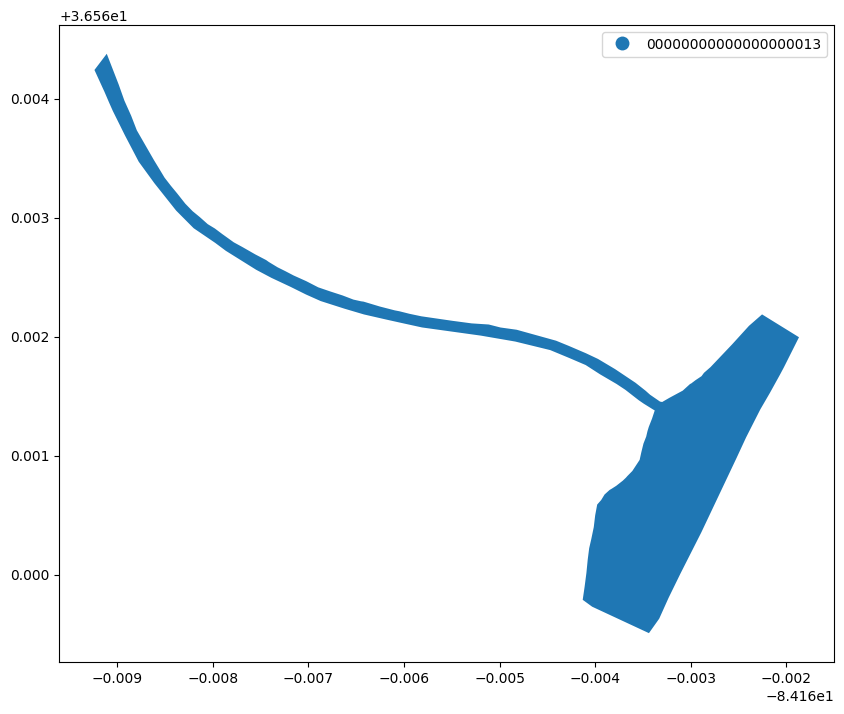

In [21]:
#example of Mine ID 00000000000000000013 shape
shape_name = '00000000000000000013'
fig, ax = plt.subplots(1, figsize=(10,10))
tn_mines[tn_mines.shapeName == shape_name].plot('shapeName', legend=True, ax=ax);

In [24]:
# Read the GeoJSON file
with open('/content/TN_Released_mines.geojson')as file:
    data = json.load(file)

In [69]:
# Create empty lists for latitude and longitude
latitudes = []
longitudes = []
coordinates = []


# Loop through the features
for feature in data['features']:
    # Access the geometry of the feature
    geometry = shape(feature['geometry'])

    # Calculate the centroid
    centroid = geometry.centroid

    # Access the central latitude and longitude
    latitude = centroid.y
    longitude = centroid.x

    # Append to the lists
    latitudes.append(latitude)
    longitudes.append(longitude)


# Add latitude and longitude columns
tn_mines['Latitude'] = latitudes
tn_mines['Longitude'] = longitudes

# Print the updated DataFrame
print(tn_mines)

                shapeName     Shape_Area   Shape_Le_1  area_mine  auger  \
0    0000000000000000000f  279564.400203  4225.466549          0      0   
1    0000000000000000007b   24737.718169   625.198953          0      0   
2    0000000000000000002f   21783.670701  1152.399733          0      0   
3    00000000000000000024   94203.193606  6550.162922          0      0   
4    0000000000000000004b  136017.796424  1475.974289          0      0   
..                    ...            ...          ...        ...    ...   
150  0000000000000000001d  651451.342785  5364.730218          0      0   
151  0000000000000000007f   34879.706798   960.211620          0      0   
152  00000000000000000092   34879.706798   960.211620          0      0   
153  00000000000000000011   48612.842004  2563.963487          0      0   
154  00000000000000000013   48612.842004  2563.963487          0      0   

     calculated  coalmine_o                       company  contact  contour  \
0     44.778976     

In [36]:
#https://gitlab.com/-/snippets/2467404

# Get dynamic world image collection by asset ID
dc = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1').filterBounds(region)

# get band names, equal to column names
bandnames = dc.first().bandNames().getInfo()[:-1]

# Initial date of interest (inclusive).
i_date = '2020-01-01'
# Final date of interest (exclusive).
f_date = '2021-01-31'

In [37]:
# Define the geometry coordinates
coords = [[[[-84.53477523347884, 36.29565786019811],
      [-84.5347218047336, 36.29547241495036],
      [-84.53432644649068, 36.295443563323964],
      [-84.53402938615251, 36.295467939301254],
      [-84.53387053743336, 36.295489635080905],
      [-84.53384950154327, 36.29550417951503],
      [-84.5338402233536, 36.29552701314537],
      [-84.53384270286993, 36.29555830091293],
      [-84.53384070325998, 36.295603239526955],
      [-84.533833584648, 36.2956528927436],
      [-84.53385622023141, 36.29579957207175],
      [-84.5338573400127, 36.295812983677614],
      [-84.53412504710549, 36.295767722407746],
      [-84.53414712268768, 36.29576658593547],
      [-84.53433316512377, 36.29573903871057],
      [-84.5344806549212, 36.29571344252075],
      [-84.53459535117551, 36.29569410155373],
      [-84.53470420842952, 36.29567053525732],
      [-84.53477523347884, 36.29565786019811]]],
    [[[-84.53582748182174, 36.29895135524295],
      [-84.53581804398412, 36.29890259770524],
      [-84.53567599634492, 36.29885619959827],
      [-84.53555770302934, 36.29883092547809],
      [-84.53531599680504, 36.29878517381046],
      [-84.53526424818773, 36.298760957484376],
      [-84.53508516722324, 36.29866718036688],
      [-84.53483114164924, 36.29846516338881],
      [-84.53481354537823, 36.298452649506245],
      [-84.53477171422168, 36.29841445346233],
      [-84.53466341697687, 36.2983752850104],
      [-84.53463582274267, 36.29837666437061],
      [-84.53461934617921, 36.298377561610046],
      [-84.53460830847874, 36.29837812984431],
      [-84.5345563192817, 36.298421197170825],
      [-84.53453568355678, 36.298440130257326],
      [-84.53450856916291, 36.29851773312071],
      [-84.53446777757308, 36.298631905103655],
      [-84.53444994124149, 36.298686592558475],
      [-84.53442218693884, 36.29875525927456],
      [-84.53444530219471, 36.298767530301774],
      [-84.53445705977806, 36.298775901603754],
      [-84.5344680175237, 36.298775329741424],
      [-84.53459767069297, 36.29880450473839],
      [-84.53477667317489, 36.298826530868105],
      [-84.53498222941177, 36.29890551781321],
      [-84.53515291252117, 36.29896394472888],
      [-84.5352436127139, 36.298990598740055],
      [-84.53538054254297, 36.299041794283795],
      [-84.53552059135136, 36.29906138154077],
      [-84.53572014632398, 36.29906455180234],
      [-84.5357914900599, 36.299056344803795],
      [-84.53583060110671, 36.29899157748621],
      [-84.53582748182174, 36.29895135524295]]],
    [[[-84.54105108996347, 36.298770206368246],
      [-84.54100166571045, 36.29870552332488],
      [-84.54088842163254, 36.298603870233634],
      [-84.54075726296159, 36.2984851534931],
      [-84.54069240329001, 36.2982958138986],
      [-84.5406812067919, 36.297875034810744],
      [-84.54068432581658, 36.29770454536836],
      [-84.54068400591662, 36.29770007736411],
      [-84.5402083127288, 36.29749620763599],
      [-84.53945693669503, 36.29716760181475],
      [-84.53871162925951, 36.297824794561244],
      [-84.5376460765669, 36.29828345795539],
      [-84.53754794204522, 36.29830198967219],
      [-84.53746588322272, 36.29831515200533],
      [-84.5373235996684, 36.29833604007515],
      [-84.53674950318616, 36.29842851820522],
      [-84.53654171373441, 36.29846167295741],
      [-84.53647077082245, 36.29847435216859],
      [-84.53630361074417, 36.29846062109642],
      [-84.53624842381862, 36.298463463112085],
      [-84.53615468590623, 36.29846833935795],
      [-84.53583484013475, 36.298484915623916],
      [-84.53558529682628, 36.29847987646652],
      [-84.53558745634028, 36.29850669510953],
      [-84.53593145789749, 36.298726424378636],
      [-84.53671239226847, 36.29900864525434],
      [-84.53731064296994, 36.29915238945465],
      [-84.53754882181754, 36.29915352539052],
      [-84.53777588261143, 36.2990834777509],
      [-84.53800254262558, 36.29900895796419],
      [-84.53803597370323, 36.29901172017373],
      [-84.5382031288033, 36.29902544859903],
      [-84.53822976160502, 36.2990823301673],
      [-84.53824951625788, 36.29912166190515],
      [-84.53829590367546, 36.29921787508044],
      [-84.5382609531591, 36.29933619026596],
      [-84.5380221373983, 36.299536827292336],
      [-84.53794671748177, 36.299563157599046],
      [-84.53777892181294, 36.29961215804716],
      [-84.53769758312818, 36.29963434210721],
      [-84.53767039022884, 36.29964019372008],
      [-84.53761560449598, 36.29964750785667],
      [-84.53746156433412, 36.29966002464026],
      [-84.53710381528158, 36.299687491929014],
      [-84.53687507227951, 36.29973519436346],
      [-84.53661385626867, 36.299793619721086],
      [-84.53641030531848, 36.299880323545764],
      [-84.53627633721214, 36.29993655553381],
      [-84.53602079719262, 36.300205283575124],
      [-84.53586771258695, 36.30037007663499],
      [-84.53583156088666, 36.30040331035502],
      [-84.5357682153754, 36.30044247755101],
      [-84.53566863801181, 36.30044312813147],
      [-84.5356020930441, 36.30044215255582],
      [-84.53553554800028, 36.30044109447211],
      [-84.53543381071884, 36.30041500933648],
      [-84.5353916600792, 36.300372346554745],
      [-84.53536750542943, 36.30034675122847],
      [-84.53532535474174, 36.30030408838918],
      [-84.53531911611746, 36.30029547441997],
      [-84.53528320402353, 36.30026142551368],
      [-84.53518618527144, 36.300154407474594],
      [-84.53515579189454, 36.300120115578046],
      [-84.53508980621902, 36.300056324936605],
      [-84.53482394317537, 36.29998497711104],
      [-84.5346023097276, 36.299983023910976],
      [-84.53460262966101, 36.29998749177124],
      [-84.53460494917819, 36.30008598154343],
      [-84.5345828737697, 36.300087117941246],
      [-84.53451120861773, 36.30009077362012],
      [-84.53450017089675, 36.30009134180988],
      [-84.53448361431136, 36.30009223532617],
      [-84.53422550693362, 36.30011904681275],
      [-84.53394916200465, 36.300196072393994],
      [-84.5338573400127, 36.300294964289925],
      [-84.53373448388047, 36.300422374587285],
      [-84.53372752522459, 36.30054377826712],
      [-84.53371096841933, 36.3007552096253],
      [-84.53359978974989, 36.3010299425735],
      [-84.53352932315947, 36.301118757602524],
      [-84.53350900700973, 36.30114224000253],
      [-84.53338830973763, 36.301296383520935],
      [-84.53315971209744, 36.30141574681392],
      [-84.53274122731662, 36.3015853185875],
      [-84.53279785731397, 36.301672019770734],
      [-84.53280441615189, 36.30168518394037],
      [-84.5328581666008, 36.30166446566365],
      [-84.53322809951922, 36.301510819160015],
      [-84.53343542089617, 36.301401452387594],
      [-84.53348325188057, 36.30137658752334],
      [-84.53372576556436, 36.30108171079152],
      [-84.53384550232376, 36.300775206586195],
      [-84.53386533844981, 36.300536628376726],
      [-84.53386773798074, 36.300496164144064],
      [-84.53387077738644, 36.30046463555245],
      [-84.53403418520072, 36.30029033842504],
      [-84.53420743057606, 36.30024101557727],
      [-84.5342559807803, 36.30022500678983],
      [-84.53453104451684, 36.30020185574538],
      [-84.53458063423503, 36.30019925399282],
      [-84.53461406727925, 36.300202017249504],
      [-84.53461030806231, 36.3002246066529],
      [-84.53461630681262, 36.30030050309638],
      [-84.53465757819797, 36.3015219046424],
      [-84.53466005767949, 36.30155318998954],
      [-84.5347320425808, 36.30155391969976],
      [-84.53482650263285, 36.301557984397164],
      [-84.53520754060833, 36.301614466886406],
      [-84.53549187777391, 36.30177901786625],
      [-84.5356222484991, 36.302027747502414],
      [-84.53570255032184, 36.30220285845899],
      [-84.53583939908907, 36.302392919671526],
      [-84.5358460375658, 36.302406087232576],
      [-84.53594737421885, 36.302427700165154],
      [-84.53608182297067, 36.302447608090134],
      [-84.53619835563505, 36.30245053502814],
      [-84.53631720751491, 36.30241299481249],
      [-84.53641398443824, 36.30237659112244],
      [-84.5366833593573, 36.3022820090867],
      [-84.5379185649534, 36.3017966529445],
      [-84.53882719692503, 36.30145372927466],
      [-84.53896147906592, 36.301401963094776],
      [-84.53946437452558, 36.30117865587269],
      [-84.53973557477285, 36.300967374677654],
      [-84.53977140414179, 36.300790714710416],
      [-84.53978196100522, 36.300714006763165],
      [-84.5398549792581, 36.300167854839785],
      [-84.54000725361101, 36.29992244705045],
      [-84.54051597821928, 36.299564394718736],
      [-84.54090945497724, 36.29914953999531],
      [-84.5409904692719, 36.298984007094916],
      [-84.54104781100948, 36.29886893781893],
      [-84.54105108996347, 36.298770206368246]]]]



In [38]:
# Create an ee.Geometry object from the coordinates
polygon = ee.Geometry.MultiPolygon(coords)

# Set the maxError parameter
max_error = 1  # Specify your desired maxError value

# Project the geometry coordinates
projected_polygon = polygon.transform('EPSG:4326', max_error)

#decrease scale to get more rows of data/granularity
ac = dc.getRegion(projected_polygon, scale=30 ).getInfo()

In [39]:
#convert to dataframe
df = pd.DataFrame(ac)
df.columns = df.iloc[0]
df = df.tail(-1)
df

In [43]:
df['latitude'].unique()
df['longitude'].unique()

array([-84.53465725490561, -84.53438776032037, -84.53411826573513,
       -84.53384877114989, -84.53950815743985, -84.54031664119556,
       -84.54004714661032, -84.53977765202508, -84.53923866285461,
       -84.5405861357808, -84.53896916826938, -84.53869967368414,
       -84.53843017909891, -84.53816068451367, -84.53789118992843,
       -84.5376216953432, -84.53735220075797, -84.54085563036602,
       -84.53708270617273, -84.53681321158749, -84.53654371700226,
       -84.53627422241702, -84.53600472783178, -84.53492674949084,
       -84.53573523324654, -84.53546573866132, -84.53519624407608,
       -84.53357927656467, -84.53277079280895], dtype=object)

In [46]:
tn_mines_exploded=tn_mines.explode()
tn_mines_exploded

shapeName     Shape_Area   Shape_Le_1  area_mine  auger  \
0   0  0000000000000000000f  279564.400203  4225.466549          0      0   
    1  0000000000000000000f  279564.400203  4225.466549          0      0   
    2  0000000000000000000f  279564.400203  4225.466549          0      0   
1   0  0000000000000000007b   24737.718169   625.198953          0      0   
2   0  0000000000000000002f   21783.670701  1152.399733          0      0   
...                     ...            ...          ...        ...    ...   
150 1  0000000000000000001d  651451.342785  5364.730218          0      0   
151 0  0000000000000000007f   34879.706798   960.211620          0      0   
152 0  00000000000000000092   34879.706798   960.211620          0      0   
153 0  00000000000000000011   48612.842004  2563.963487          0      0   
154 0  00000000000000000013   48612.842004  2563.963487          0      0   

       calculated  coalmine_o                    company  contact  contour  \
0   0   44.778976           2                 COALCO INC        4        0   
    1   44.778976           2                 COALCO INC        4        0   
    2   44.778976           2                 COALCO INC        4        0   
1   0    3.939389           2                  ENCOL INC        4        0   
2   0    3.473654           2              DEBCO COAL CO        4        0   
...           ...         ...                        ...      ...      ...   
150 1  104.734960           2  NATIONAL COAL CORPORATION        4        0   
151 0    5.569072           2                 ENERGY INC        4        0   
152 0    5.569072           2       TENNESSEE MINING INC        4        0   
153 0    7.735888           2       TRIPLE I COAL CO INC        4        0   
154 0    7.735888           2                GARCOAL INC        4        0   

       highwall  inspectabl                       mine_name  mountainto  \
0   0         0           2                                           0   
    1         0           2                                           0   
    2         0           2                                           0   
1   0         0           2                               1           0   
2   0         0           2                               1           0   
...         ...         ...                             ...         ...   
150 1         0           2        REFUSE IMPOUNDMENT NO. 3           0   
151 0         0           2    ENERGY COAL WASH FACILITY #1           0   
152 0         0           2    ENERGY COAL WASH FACILITY #1           0   
153 0         0           2  DAVEX ENERGY SHIPPING & PROCES           0   
154 0         0           2  DAVEX ENERGY SHIPPING & PROCES           0   

      msha_id national_i   Latitude  Longitude  \
0   0           TN81-212  36.299869 -84.537769   
    1           TN81-212  36.299869 -84.537769   
    2           TN81-212  36.299869 -84.537769   
1   0           TN80-A08  36.528626 -83.901399   
2   0           TN79-A10  36.476134 -84.278073   
...       ...        ...        ...        ...   
150 1             TN3194  36.150364 -84.391128   
151 0             TN2454  36.425580 -84.146756   
152 0             TN3030  36.425580 -84.146756   
153 0           TN82-A11  36.561232 -84.163954   
154 0             TN2593  36.561232 -84.163954   

                                             Coordinates  \
0   0  MULTIPOLYGON (((-84.53477523347884 36.29565786...   
    1  MULTIPOLYGON (((-84.53477523347884 36.29565786...   
    2  MULTIPOLYGON (((-84.53477523347884 36.29565786...   
1   0  POLYGON ((-83.90237695786473 36.52820381950384...   
2   0  MULTIPOLYGON (((-84.27799877663693 36.47555278...   
...                                                  ...   
150 1  GEOMETRYCOLLECTION (LINESTRING (-84.3905438632...   
151 0  POLYGON ((-84.14756412328667 36.42470881135651...   
152 0  POLYGON ((-84.14756412328667 36.42470881135651...   
153 0  POLYGON ((-84.16923963767744 36.56424080913011.

In [72]:
coordinates = tn_mines['geometry'].values[0]

In [93]:
len(tn_mines_exploded['geometry'])

237

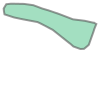

In [92]:
tn_mines_exploded['geometry'].values[1]

In [ ]:
i=0

df_contructor = []
while i<=len(tn_mines_exploded['geometry']):

    polygon = tn_mines_exploded['geometry'].values[i]

    # Extract the coordinates from the polygon
    coordinates = polygon.exterior.coords[:]

    # Create an ee.Geometry object from the coordinates
    polygon = ee.Geometry.MultiPolygon(coordinates)

    # Set the maxError parameter
    max_error = 1  # Specify your desired maxError value

    # Project the geometry coordinates
    projected_polygon = polygon.transform('EPSG:4326', max_error)

    #decrease scale to get more rows of data/granularity
    ac = dc.getRegion(projected_polygon, scale=30 ).getInfo()
    df_constructor =pd.DataFrame(ac)
    df_constructor.columns = df_constructor.iloc[0]
    df_constructor = df_constructor.tail(-1)
    df.append(df_constructor)

    i+=1

In [ ]:
df['latitude'].unique()
df['longitude'].unique()